# Test on creating a linear regression model for finding amplitude of a square wave given frequency, time and phase


### Importing modules and packages


In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
%matplotlib inline


## Creating Training Dataset
The training dataset would be in the form of 3 rows:
- First row contains time of observation.
- Second row contains freqency of the signal.
- Third row contains phase of the signal.


In [47]:
# Creating  training feature vectors
# taking 1000 samples between -1 and 1 with 1 included.
train_set_time = np.linspace(-1, 1, 1000, endpoint=True).reshape(1, 1000)
train_set_freq = np.arange(1000).reshape(1, 1000)
# End point is false because 0 and 360 phase is same.
train_set_phase = np.linspace(0,360,1000, endpoint=False).reshape(1, 1000)
train_set_x = np.concatenate((train_set_time, train_set_freq, train_set_phase))
print("Train set: \n", train_set_x)
print("Shape of train set: "+str(train_set_x.shape))


Train set: 
 [[-1.00000000e+00 -9.97997998e-01 -9.95995996e-01 ...  9.95995996e-01
   9.97997998e-01  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  2.00000000e+00 ...  9.97000000e+02
   9.98000000e+02  9.99000000e+02]
 [ 0.00000000e+00  3.60000000e-01  7.20000000e-01 ...  3.58920000e+02
   3.59280000e+02  3.59640000e+02]]
Shape of train set: (3, 1000)


In [20]:
# Creating  testing feature vectors
# taking 100 samples between -1 and 1 with 1 included.
test_set_time = np.linspace(2, 20, 50, endpoint=True).reshape(1, 50)
test_set_freq = np.arange(50).reshape(1, 50)
test_set_phase = np.linspace(0,360,50, endpoint=False).reshape(1, 50)
test_set_x = np.concatenate((test_set_time, test_set_freq, test_set_phase))
print("Test set: \n", test_set_x)
print("Shape of test set: "+str(test_set_x.shape))

Test set: 
 [[  2.           2.36734694   2.73469388   3.10204082   3.46938776
    3.83673469   4.20408163   4.57142857   4.93877551   5.30612245
    5.67346939   6.04081633   6.40816327   6.7755102    7.14285714
    7.51020408   7.87755102   8.24489796   8.6122449    8.97959184
    9.34693878   9.71428571  10.08163265  10.44897959  10.81632653
   11.18367347  11.55102041  11.91836735  12.28571429  12.65306122
   13.02040816  13.3877551   13.75510204  14.12244898  14.48979592
   14.85714286  15.2244898   15.59183673  15.95918367  16.32653061
   16.69387755  17.06122449  17.42857143  17.79591837  18.16326531
   18.53061224  18.89795918  19.26530612  19.63265306  20.        ]
 [  0.           1.           2.           3.           4.
    5.           6.           7.           8.           9.
   10.          11.          12.          13.          14.
   15.          16.          17.          18.          19.
   20.          21.          22.          23.          24.
   25.          26.   

### Helper Functions


### Square Wave Function


In [21]:
# Function to find the square wave amplitude, taking input time,frequecy, phase of the wave.
def square_wave_function(time, frequency, phase):
    return signal.square(2*np.pi*frequency*time + phase)


### Testing Square Wave Function


Shape of time vector:  (1, 100)
First 5 column elements of time vector: 
 [0.         0.01010101 0.02020202 0.03030303 0.04040404]
Shape of amplitude vector:  (1, 100)
First 5 column elements of amplitude vector: 
 [-1. -1. -1. -1. -1.]


Text(0.5, 1.0, 'Square Wave, Phase angle 30, Frequenct 5Hz')

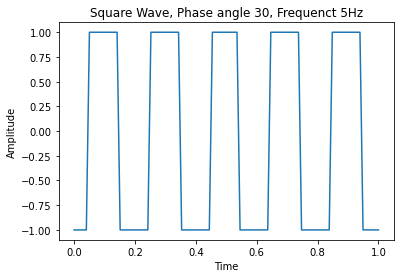

In [22]:
# Gives out rank 1 vector which is inconsistent so we reshape it to (1,100) vector which is a row vector.
test_wave_time = np.linspace(0, 1, 100, endpoint=True).reshape(1, 100)
print("Shape of time vector: ", str(test_wave_time.shape))
print("First 5 column elements of time vector: \n", test_wave_time[0, 0:5])
# =================================================
test_wave_amplitude = square_wave_function(test_wave_time, 5, 30)
print("Shape of amplitude vector: ", str(test_wave_amplitude.shape))
print("First 5 column elements of amplitude vector: \n",
      test_wave_amplitude[0, 0:5])
# =================================================

plt.plot(test_wave_time[0], test_wave_amplitude[0])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Square Wave, Phase angle 30, Frequenct 5Hz")


It should be in the shape of a square wave.

<table style="width:35">
    <tr>
        <td>
            Shape of time vector
        </td>
        <td>
            (1, 100)
        </td>
    </tr>
    <tr>
        <td>
            Shape of amplitude vector
        </td>
        <td>
            (1, 100)
        </td>
    </tr>
</table>


In [70]:
# Creating label vectors
train_set_y = square_wave_function(train_set_x[0], train_set_x[1], train_set_x[2]).reshape(1,1000)
test_set_y = square_wave_function(test_set_x[0], test_set_x[1], test_set_x[2]).reshape(1,50)
print("3 examples of training feature vector: \n",train_set_x[:,0:3])
print("Corresponding training lables:\n",train_set_y[:,0:3])
print("Shape of train labels: "+str(train_set_y.shape))
for i in range(0,50):
    print("=",end="")
print()
print("3 examples of test feature vector: \n",test_set_x[:,0:3])
print("Corresponding test lables:\n",test_set_y[:,0:3])
print("Shape of test labels: "+str(test_set_y.shape))


3 examples of training feature vector: 
 [[-1.       -0.997998 -0.995996]
 [ 0.        1.        2.      ]
 [ 0.        0.36      0.72    ]]
Corresponding training lables:
 [[1. 1. 1.]]
Shape of train labels: (1, 1000)
3 examples of test feature vector: 
 [[ 2.          2.36734694  2.73469388]
 [ 0.          1.          2.        ]
 [ 0.          7.2        14.4       ]]
Corresponding test lables:
 [[ 1. -1. -1.]]
Shape of test labels: (1, 50)


In [61]:
# Final verification of dataset
singleArray = train_set_x
print("1st element of train array: \n", singleArray[0,1])
test = square_wave_function(
    singleArray[0, 8], singleArray[1, 8], singleArray[2,8])
print(test)
# check the outut of this cell wih the cells above

1st element of train array: 
 -0.997997997997998
-1.0


# Building the model


In [150]:
# Activation Function
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [143]:
# Initilizing Parameters (weights and bias)
def initialize_parameters(dimension):
    

SyntaxError: unexpected EOF while parsing (3602031354.py, line 3)